# MQ-5

## Ro calculation

### Specifications

#### Standard Work Condition

    Vc (Circuit Voltage)       :  5v +/- 0.1
    Vh (Heating Voltage)       :  5v +/- 0.1
    Rl (Load Resistance)       :  20KOhm
    Rh (Heater Resistance)     :  33Ohm +/- 5%
    Ph (Heating consumption)   :  less than 800mw
    

#### Sensitivity Characteristic:

    Rs (Sensing Resistance)    : 10kOhm  -  60kOhm (5000ppm methane)
    Preheat Time               : Over 24 hour
    
    Detecting Concentration Scope:
        LPG, LNG, Natuarl Gas, Propane and Town Gas:  200ppm  - 10000ppm 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
## Gas concentration values referenced in the datasheet

POINTS = {
    # Hydrogen
    'h2' : {
        'p1' : {'x': 200,   'y':1.730},
        'p2' : {'x': 500,   'y':1.215},
        'p3' : {'x': 800,   'y':1.050},
        'p4' : {'x': 1000,  'y':0.988},
        'p5' : {'x': 1500,  'y':0.875},
        'p6' : {'x': 2000,  'y':0.823},
        'p7' : {'x': 3000,  'y':0.765},
        'p8' : {'x': 5000,  'y':0.728},
        'p9' : {'x': 10000, 'y':0.657}
    },

    # Liquefied Petroleum Gas
    'lpg' : {
        'p1' : {'x': 200,   'y':0.698},
        'p2' : {'x': 500,   'y':0.473},
        'p3' : {'x': 800,   'y':0.389},
        'p4' : {'x': 1000,  'y':0.355},
        'p5' : {'x': 1500,  'y':0.297},
        'p6' : {'x': 2000,  'y':0.268},
        'p7' : {'x': 3000,  'y':0.230},
        'p8' : {'x': 5000,  'y':0.189},
        'p9' : {'x': 10000, 'y':0.145}
    },

    # Methane
    'ch4' : {
        'p1' : {'x': 200,   'y':0.952},
        'p2' : {'x': 500,   'y':0.673},
        'p3' : {'x': 800,   'y':0.554},
        'p4' : {'x': 1000,  'y':0.515},
        'p5' : {'x': 1500,  'y':0.445},
        'p6' : {'x': 2000,  'y':0.400},
        'p7' : {'x': 3000,  'y':0.340},
        'p8' : {'x': 5000,  'y':0.275},
        'p9' : {'x': 10000, 'y':0.204}
    },

    # Carbon Monoxide
    'co' : {
        'p1' : {'x': 200,   'y':3.890},
        'p2' : {'x': 500,   'y':3.201},
        'p3' : {'x': 800,   'y':3.012},
        'p4' : {'x': 1000,  'y':2.886},
        'p5' : {'x': 1500,  'y':2.666},
        'p6' : {'x': 2000,  'y':2.555},
        'p7' : {'x': 3000,  'y':2.448},
        'p8' : {'x': 5000,  'y':2.375},
        'p9' : {'x': 10000, 'y':2.276}
    },

    'alcohol' : {
        'p1' : {'x': 200,   'y':3.507},
        'p2' : {'x': 500,   'y':2.921},
        'p3' : {'x': 800,   'y':2.666},
        'p4' : {'x': 1000,  'y':2.555},
        'p5' : {'x': 1500,  'y':2.332},
        'p6' : {'x': 2000,  'y':2.235},
        'p7' : {'x': 3000,  'y':2.039},
        'p8' : {'x': 5000,  'y':1.817},
        'p9' : {'x': 10000, 'y':1.441}
    }   
}


AIR = 6.464

GASES = ['h2', 'lpg', 'ch4', 'co', 'alcohol']

In [3]:
# RS value calculation
Rs    = lambda Vcc, Vrl, RL : ((Vcc * RL) / Vrl) - RL

# R0 value calculation
R0    = lambda Rs, air : Rs / air

# RS/Ro value calculation (ratio)
Ratio = lambda Rs, R0: Rs / R0

# log(y) = m.log(x) + b
# m
M     = lambda p1, p2 : (math.log10( p2['y'] / p1['y'] )) / (math.log10(p2['x']/p1['x']))
# b
B     = lambda p, m : math.log10(p['y']) - (m * math.log10(p['x']))

# PPM value calculation 
PPM   = lambda  racio, m, b: 10 ** ((math.log10(racio) - b) / m)

In [4]:
## Calculate the points to be used for the calculation of _m_ and _b_ according to the _ratio_ value 
def getPoints(racio, values):
    size = len(values)
    for idx in range(size - 1):
        if racio >= values[idx]['y']:
            if idx == 0:
                return (values[0], values[1])
            return(values[idx - 1], values[idx])
    return(values[size - 2], values[size - 1])

In [5]:
pList = {}
for gas in GASES:
    pList[gas] = list(POINTS[gas].values())

In [6]:
col_list = ["date", "mq5_1", "mq5_2"]
df = pd.read_csv('EmptyRoom_9-14Jun.csv', usecols=col_list)

df['date']= pd.to_datetime(df['date'])

mq5_1 = df[["date","mq5_1"]]
mq5_2 = df[["date","mq5_2"]]

### Ro values to be considered

- __Sensor 1__: 28.2 kOhms
- __Sensor 2__: 18.81 kOhms

In [7]:
# MQ 5 - sensor 1
sensor1 = {}
sensor1['Vcc'] = 5     #volts
sensor1['RL']  = 10    #kOhms
sensor1['AIR'] = AIR   
sensor1['Ro']  = 28.2  #kOhms


# MQ 5 - sensor 2
sensor2 = {}
sensor2['Vcc'] = 5     #volts
sensor2['RL']  = 10    #kOhms
sensor2['AIR'] = AIR   
sensor2['Ro']  = 18.81 #kOhms

In [8]:
# Min; Mean; Median; Quantile [0.25, 0.5, 0.75]; Max

Vrl = [
    mq5_1['mq5_1'].min(),
    mq5_1['mq5_1'].mean(), 
    mq5_1['mq5_1'].quantile(0.25),
    mq5_1['mq5_1'].quantile(0.5),
    mq5_1['mq5_1'].quantile(0.75),
    mq5_1['mq5_1'].max()]

sensor1['Rs'] = [Rs(sensor1['Vcc'] , v, sensor1['RL'] ) for v in Vrl]
sensor1['Ratio'] = [Ratio(rs, sensor1['Ro']) for rs in sensor1['Rs']]

ppm1 = {}
for gas in GASES:
    ppm1[gas] = []

for r in sensor1['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm1[gas].append(PPM(r, m, b))

In [9]:
# Min; Mean; Median; Quantile [0.25, 0.5, 0.75]; Max
Vrl = [
    mq5_2['mq5_2'].min(),
    mq5_2['mq5_2'].mean(), 
    mq5_2['mq5_2'].quantile(0.25),
    mq5_2['mq5_2'].quantile(0.5),
    mq5_2['mq5_2'].quantile(0.75),
    mq5_2['mq5_2'].max()]

sensor2['Rs'] = [Rs(sensor2['Vcc'] , v, sensor2['RL'] ) for v in Vrl]
sensor2['Ratio'] = [Ratio(rs, sensor2['Ro']) for rs in sensor2['Rs']]

ppm2 = {}
for gas in GASES:
    ppm2[gas] = []

for r in sensor2['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm2[gas].append(PPM(r, m, b))

In [10]:
print(f"Period in which the readings were carried out: {mq5_1['date'].min()} - {mq5_1['date'].max()} \n")

print("Sensor 1")


print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('', 'Min', 'Mean', '1Q', '2Q', '3Q', 'Max'))

print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('Rs/Ro', 
               round(sensor1['Ratio'][0],3),
               round(sensor1['Ratio'][1],3),
               round(sensor1['Ratio'][2],3),
               round(sensor1['Ratio'][3],3),
               round(sensor1['Ratio'][4],3),
               round(sensor1['Ratio'][5],3)))

for gas in GASES:
    print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
           .format(gas.upper(), 
                   round(ppm1[gas][0],3),
                   round(ppm1[gas][1],3),
                   round(ppm1[gas][2],3),
                   round(ppm1[gas][3],3),
                   round(ppm1[gas][4],3),
                   round(ppm1[gas][5],3)))
    
print("-"*(12*7))
    
print("Sensor 2")

print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('', 'Min', 'Mean', '1Q', '2Q', '3Q', 'Max'))

print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('Rs/Ro', 
               round(sensor2['Ratio'][0],3),
               round(sensor2['Ratio'][1],3),
               round(sensor2['Ratio'][2],3),
               round(sensor2['Ratio'][3],3),
               round(sensor2['Ratio'][4],3),
               round(sensor2['Ratio'][5],3)))

for gas in GASES:
    print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
           .format(gas.upper(), 
                   round(ppm2[gas][0],3),
                   round(ppm2[gas][1],3),
                   round(ppm2[gas][2],3),
                   round(ppm2[gas][3],3),
                   round(ppm2[gas][4],3),
                   round(ppm2[gas][5],3)))

Period in which the readings were carried out: 2022-06-09 20:27:00 - 2022-06-14 09:08:00 

Sensor 1
             Min          Mean         1Q           2Q           3Q           Max         
Rs/Ro        6.465        5.22         5.978        5.556        4.86         2.143       
H2           6.554        11.415       8.031        9.71         13.734       114.851     
LPG          1.058        1.752        1.273        1.513        2.072        14.257      
CH4          1.268        2.232        1.56         1.892        2.694        23.455      
CO           18.371       50.224       26.548       37.457       70.223       26723.164   
ALCOHOL      9.329        27.262       13.815       19.942       38.974       2409.886    
------------------------------------------------------------------------------------
Sensor 2
             Min          Mean         1Q           2Q           3Q           Max         
Rs/Ro        6.464        6.168        6.284        6.114        6.114        

In [11]:
font = {
    'family': 'serif',
    'color':  'tab:red',
    'weight': 'normal',
    'size': 14
}

font_title = {
    'family': 'serif',
    'color':  'tab:blue',
    'weight': 'normal',
    'size': 16,
}

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray','tab:olive','tab:cyan']

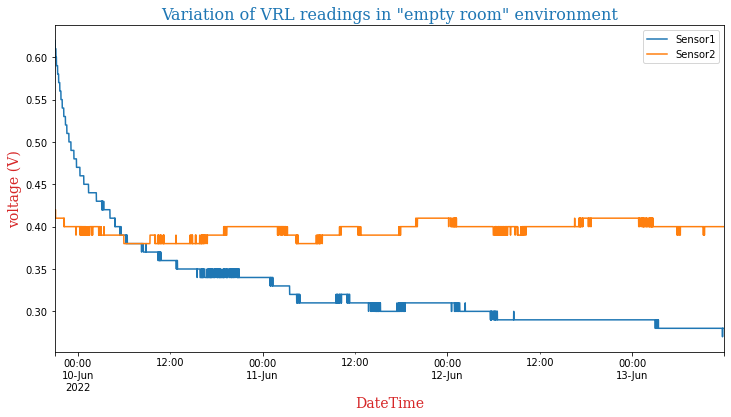

In [12]:
fdf = df[(df['date'] > '6/9/22 9:00 PM') & (df['date'] < '6/13/22 12:00 PM')]

ax = fdf.plot(x='date', y=["mq5_1","mq5_2"], 
              kind="line", figsize=(12, 6))

plt.title('Variation of VRL readings in "empty room" environment', fontdict=font_title)
plt.xlabel('DateTime',    fontdict=font)
plt.ylabel('voltage (V)', fontdict=font)
plt.legend(['Sensor1', 'Sensor2'], loc='best')


plt.show()

In [13]:
# MQ 5 Sensor1

sensor1['Rs'] = [Rs(sensor1['Vcc'] , v, sensor1['RL'] ) for v in mq5_1["mq5_1"]]
sensor1['Ratio'] = [Ratio(rs, sensor1['Ro']) for rs in sensor1['Rs']]

ppm1 = {}
for gas in GASES:
    ppm1[gas] = []

for r in sensor1['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm1[gas].append(PPM(r, m, b))

for gas in GASES:
    mq5_1[gas] = ppm1[gas]

In [14]:
# MQ 5 Sensor 2

sensor2['Rs'] = [Rs(sensor2['Vcc'] , v, sensor2['RL'] ) for v in mq5_2["mq5_2"]]
sensor2['Ratio'] = [Ratio(rs, sensor2['Ro']) for rs in sensor2['Rs']]

ppm2 = {}
for gas in GASES:
    ppm2[gas] = []
    
for r in sensor2['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm2[gas].append(PPM(r, m, b))

for gas in GASES:
    mq5_2[gas] = ppm2[gas]

In [15]:
mq5_1.describe()

,mq5_1,h2,lpg,ch4,co,alcohol
count,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000
mean,0.318086,12.619677,1.890722,2.480511,124.904370,50.762302
std,0.059713,9.890302,1.264798,2.006560,862.132148,145.768077
min,0.260000,6.554494,1.058493,1.267993,18.370861,9.329434
25%,0.280000,8.030713,1.272914,1.559551,26.548268,13.815105
50%,0.300000,9.710220,1.512508,1.892492,37.457445,19.941559
75%,0.340000,13.734119,2.072227,2.694343,70.222890,38.974377
max,0.710000,114.851060,14.257466,23.454511,26723.163828,2409.885607


In [16]:
mq5_2.describe()

,mq5_2,h2,lpg,ch4,co,alcohol
count,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000,6522.000000
mean,0.396769,7.413654,1.183586,1.437596,23.028825,11.876335
std,0.008598,0.449555,0.065233,0.088807,2.514004,1.381119
min,0.380000,6.557872,1.058988,1.268659,18.388028,9.338730
25%,0.390000,7.054304,1.131543,1.366581,20.988513,10.753246
50%,0.400000,7.575479,1.207211,1.469523,23.883351,12.341562
75%,0.400000,7.575479,1.207211,1.469523,23.883351,12.341562
max,0.430000,9.294349,1.453563,1.809941,34.600201,18.323861


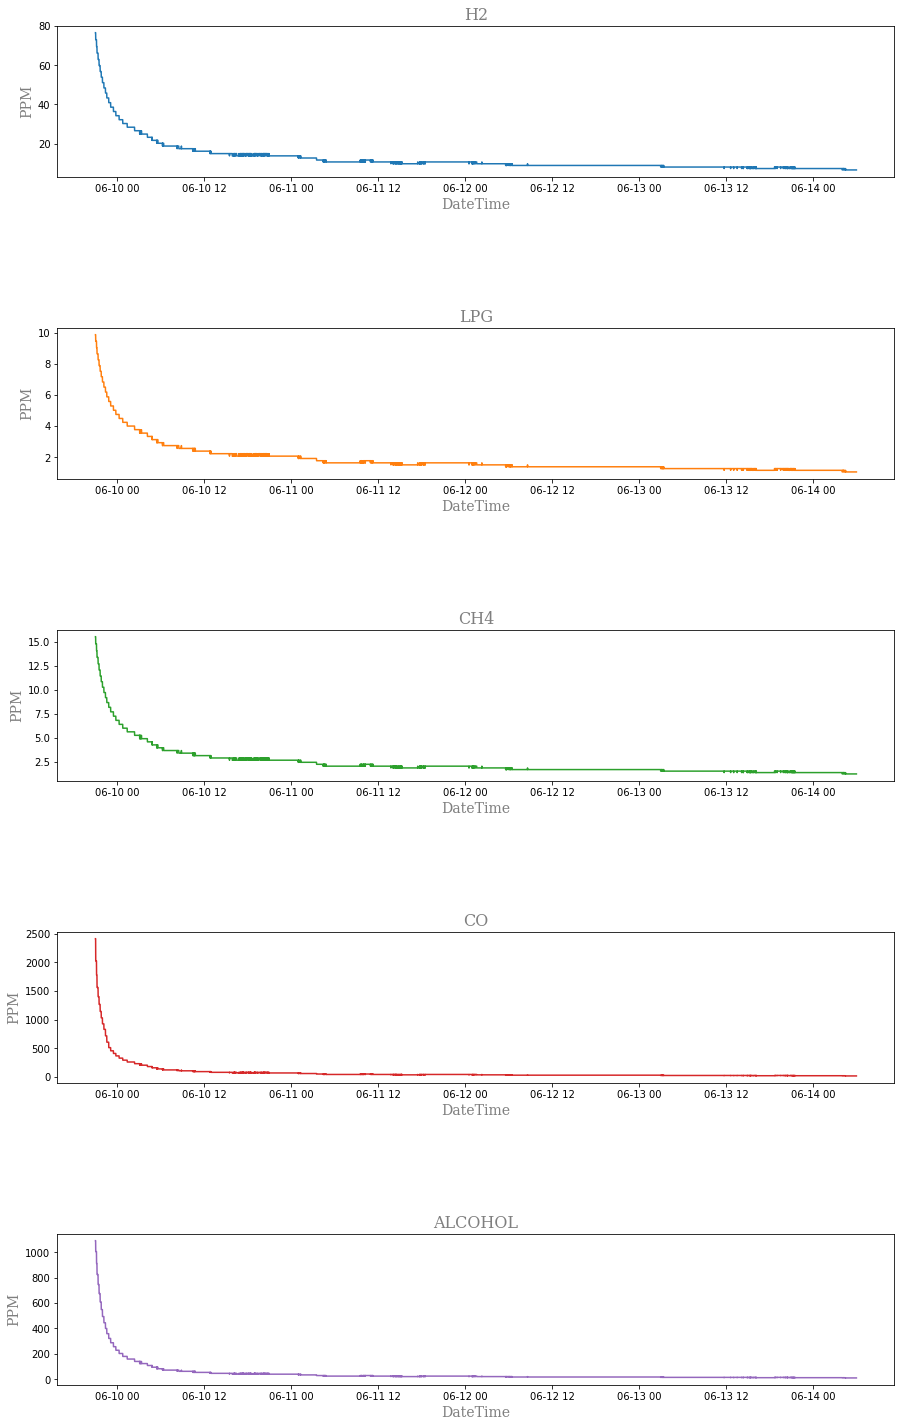

In [17]:
# Time Interval:
#           min: 2022-06-09 20:27:00
#           max: 2022-06-14 09:08:00 

fmq = mq5_1[(mq5_1['date'] > '6/9/22 9:00 PM') & (mq5_1['date'] < '6/14/22 06:00 AM')]

plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace = 1)

for idx in range(len(GASES)):
    plt.subplot(len(GASES) * 100 + 11 + idx)
    plt.plot(fmq['date']         , fmq[GASES[idx]],        color=colors[idx])
    plt.xlabel('DateTime'        , fontdict=font,          color='tab:gray')
    plt.ylabel('PPM'             , fontdict=font,          color='tab:gray')
    plt.title(GASES[idx].upper() , fontdict=font_title,    color='tab:gray')
    


plt.show()

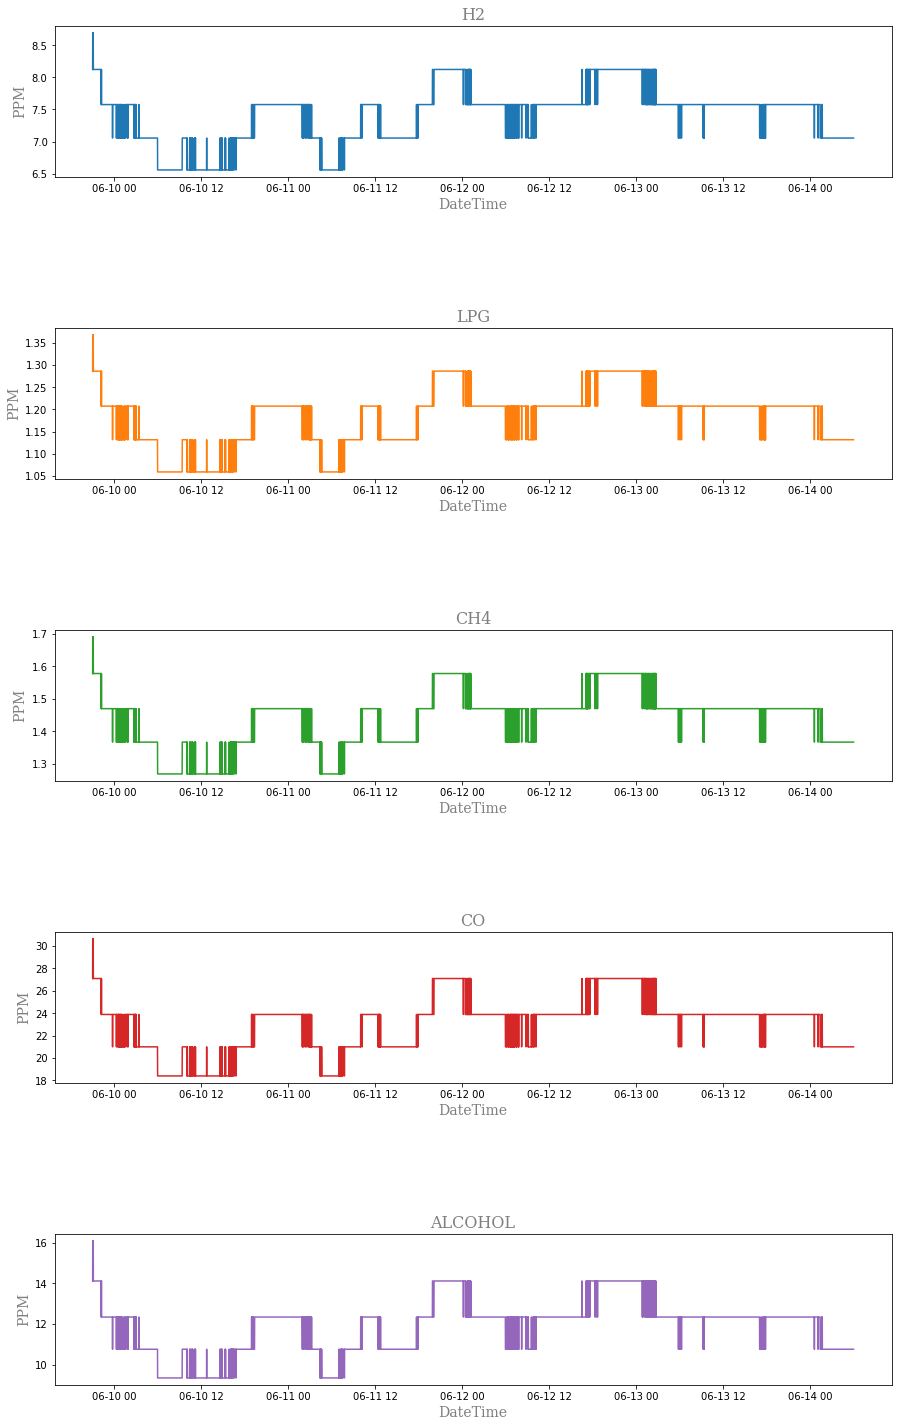

In [18]:
# Time Interval:
#           min: 2022-06-09 20:27:00
#           max: 2022-06-14 09:08:00 

fmq = mq5_2[(mq5_2['date'] > '6/9/22 9:00 PM') & (mq5_2['date'] < '6/14/22 06:00 AM')]

plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace = 1)

for idx in range(len(GASES)):
    plt.subplot(len(GASES) * 100 + 11 + idx)
    plt.plot(fmq['date']         , fmq[GASES[idx]],        color=colors[idx])
    plt.xlabel('DateTime'        , fontdict=font,          color='tab:gray')
    plt.ylabel('PPM'             , fontdict=font,          color='tab:gray')
    plt.title(GASES[idx].upper() , fontdict=font_title,    color='tab:gray')
    


plt.show()

In [19]:
# Save in excel file
mq5_1.to_csv('mq5_1_in_empty_room.csv')
mq5_2.to_csv('mq5_2_in_empty_room.csv')